
# Reduce Dimensionality & Clustering

In [ ]:
import numpy as np
text_embeddings = np.load('drive/My Drive/RestMex23/Clustering/emb_l12v2_spacy.npy')

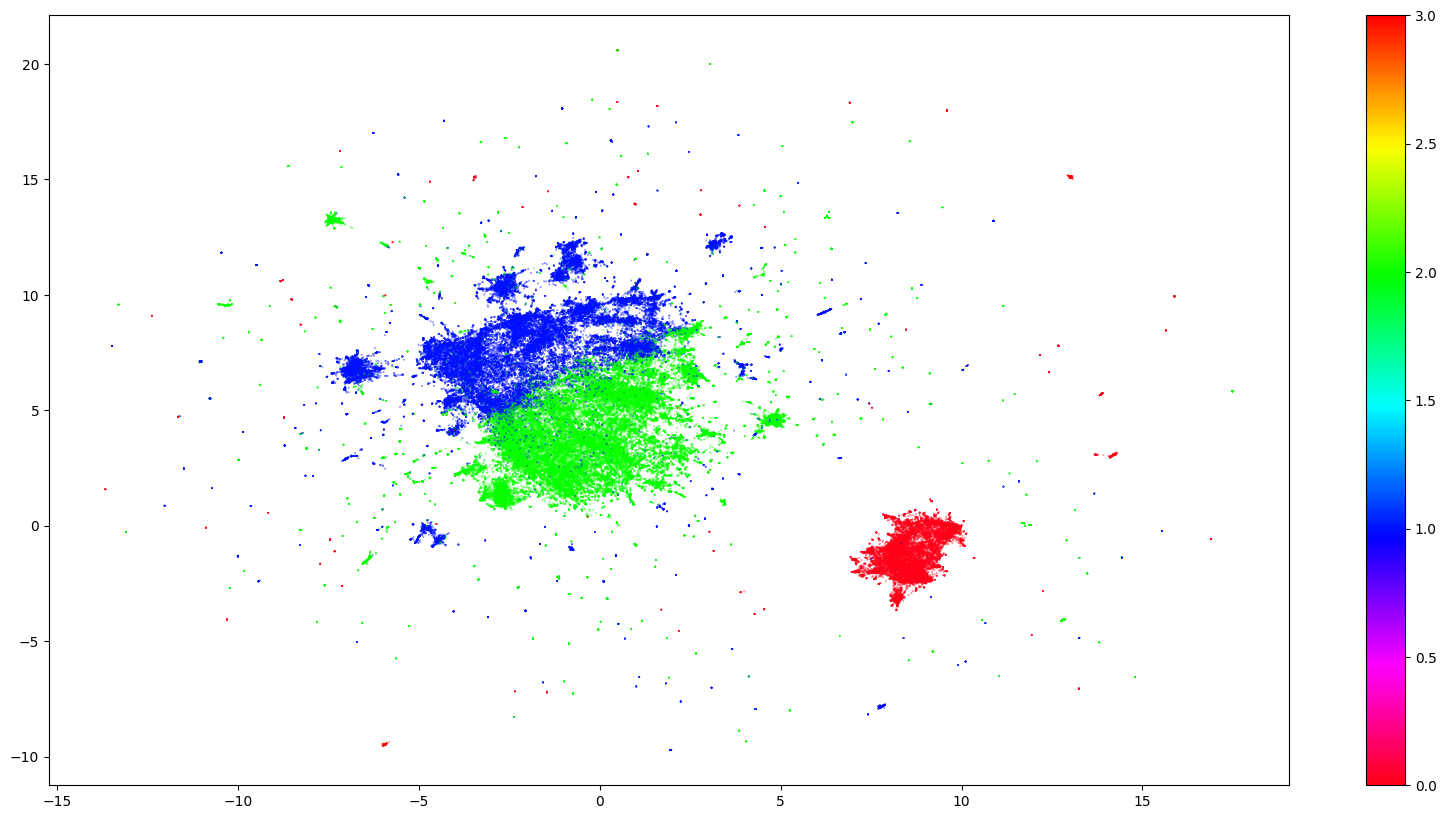

In [ ]:
import umap.umap_ as umap

NEIGHBORS = 10
N_COMPONENTS = 6

# Reduce sentence embeddings 384 dim
umap_embeddings = umap.UMAP(n_neighbors=NEIGHBORS, 
                            n_components=N_COMPONENTS, 
                            metric='cosine', random_state=42).fit_transform(text_embeddings)

# Perform clustering using KMeans
from sklearn.cluster import KMeans
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters)
cluster_labels = kmeans.fit_predict(umap_embeddings)

# Perform clustering using GaussianMixture
# from sklearn.mixture import GaussianMixture
# gmm = GaussianMixture(n_components=4)
# gmm.fit(text_embeddings)
# cluster_labels = gmm.predict(text_embeddings)

# Reduce to 2-dim to plot
import matplotlib.pyplot as plt
umap_data = umap.UMAP(n_neighbors=NEIGHBORS, n_components=2, min_dist=0.0, metric='cosine', random_state=42).fit_transform(text_embeddings)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster_labels

# Visualize clusters
fig, ax = plt.subplots(figsize=(10, 5))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()